In [1]:
cd("$(homedir())/Documents/enso_project.jl")

In [2]:
using Pkg
Pkg.activate(".")
Pkg.add(["DataFrames", "CSV", "Plots", "Dates"])

  Activating project at `C:\Users\lihel\Documents\enso_project.jl`
    Updating registry at `C:\Users\lihel\.julia\registries\General.toml`
   Resolving package versions...
   Installed PredefinedDynamicalSystems ─ v1.3.0
   Installed MarchingCubes ────────────── v0.1.11
   Installed StateSpaceSets ───────────── v2.4.0
   Installed Roots ────────────────────── v2.2.5
   Installed DynamicalSystemsBase ─────── v3.13.2
   Installed Polynomials ──────────────── v4.0.17
   Installed Measurements ─────────────── v2.12.0
   Installed Clustering ───────────────── v0.15.8
   Installed IntervalArithmetic ───────── v0.22.23
   Installed FractalDimensions ────────── v1.9.2
   Installed UnicodePlots ─────────────── v3.7.2
   Installed DynamicalSystems ─────────── v3.4.1
   Installed Attractors ───────────────── v1.24.1
   Installed ChaosTools ───────────────── v3.3.1
   Installed Wavelets ─────────────────── v0.10.1
   Installed RecurrenceAnalysis ───────── v2.1.1
   Installed ComplexityMeasures ──

In [3]:
using DataFrames, CSV, Plots, Dates

## SOI Data

In [4]:
df = CSV.read("data/soi_anomaly.txt", DataFrame; delim=' ', ignorerepeated=true)

┌ Warning: thread = 1 warning: only found 2 / 13 columns around data row: 75. Filling remaining columns with `missing`
└ @ CSV C:\Users\lihel\.julia\packages\CSV\XLcqT\src\file.jl:592


Row,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
,Int64,Float64,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?
1,1951,2.5,1.5,-0.2,-0.5,-1.1,0.3,-1.7,-0.4,-1.8,-1.6,-1.3,-1.2
2,1952,-1.5,-1.0,0.9,-0.4,1.2,1.2,0.8,0.1,-0.4,0.6,0.0,-2.0
3,1953,0.5,-0.8,-0.3,0.3,-2.8,0.2,-0.0,-2.0,-2.1,0.1,-0.5,-0.8
4,1954,1.1,-0.5,0.4,1.1,0.8,0.2,0.7,1.8,0.3,0.4,0.2,2.3
5,1955,-0.9,3.1,1.1,-0.2,1.7,2.2,2.6,2.4,2.2,2.5,2.0,1.6
6,1956,2.2,2.7,2.2,1.5,2.3,1.8,1.8,2.0,0.1,2.9,0.2,1.8
7,1957,1.0,-0.1,0.3,0.4,-1.1,0.3,0.4,-0.8,-1.5,0.1,-1.6,-0.5
8,1958,-3.1,-0.8,0.4,0.6,-0.8,0.5,0.7,1.5,-0.5,0.1,-0.7,-1.0
9,1959,-1.5,-2.3,2.1,0.7,0.8,-0.2,-0.4,-0.2,0.0,0.8,1.5,1.5


In [5]:
df_soi = DataFrame(YR = repeat(1951:2025, inner=12), MON = repeat(1:12, outer=75))
delete!(df_soi, collect(890:900))

Row,YR,MON
,Int64,Int64
1,1951,1
2,1951,2
3,1951,3
4,1951,4
5,1951,5
6,1951,6
7,1951,7
8,1951,8
9,1951,9


In [6]:
# create data array
oni = []
for i in 1:nrow(df)
    for j in 2:ncol(df)
        push!(oni, df[i,j])
    end
end

oni = filter(x -> !ismissing(x), oni)

889-element Vector{Any}:
  2.5
  1.5
 -0.2
 -0.5
 -1.1
  0.3
 -1.7
 -0.4
 -1.8
 -1.6
  ⋮
  0.8
  0.1
 -1.2
  1.5
 -0.2
  0.8
  0.8
  1.9
  0.3

In [7]:
df_soi.ONI = oni
df_soi

Row,YR,MON,ONI
,Int64,Int64,Any
1,1951,1,2.5
2,1951,2,1.5
3,1951,3,-0.2
4,1951,4,-0.5
5,1951,5,-1.1
6,1951,6,0.3
7,1951,7,-1.7
8,1951,8,-0.4
9,1951,9,-1.8


In [8]:
df_soi.DATE = Date.(df_soi.YR, df_soi.MON, 1)
df_soi = df_soi[:, ["DATE", "ONI"]]

Row,DATE,ONI
,Date,Any
1,1951-01-01,2.5
2,1951-02-01,1.5
3,1951-03-01,-0.2
4,1951-04-01,-0.5
5,1951-05-01,-1.1
6,1951-06-01,0.3
7,1951-07-01,-1.7
8,1951-08-01,-0.4
9,1951-09-01,-1.8


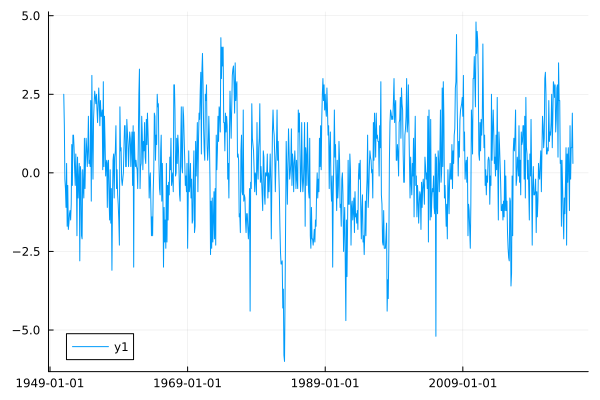

In [10]:
CSV.write("data/soi_anomaly_format.csv", df_soi)
plot(df_soi[:,"DATE"], df_soi[:, "ONI"])

## SST Data

In [11]:
df_sst = CSV.read("data/sstoi.indices.txt", DataFrame; delim=' ', ignorerepeated=true)

Row,YR,MON,NINO1+2,ANOM,NINO3,ANOM_1,NINO4,ANOM_2,NINO3.4,ANOM_3
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1982,1,24.28,-0.24,25.84,0.17,28.01,-0.21,26.65,0.08
2,1982,2,25.38,-0.72,26.26,-0.11,27.99,-0.11,26.54,-0.2
3,1982,3,25.22,-1.38,26.92,-0.25,28.18,-0.05,27.09,-0.14
4,1982,4,24.57,-1.16,27.52,-0.05,28.61,0.1,27.83,0.02
5,1982,5,24.0,-0.62,27.7,0.49,29.19,0.4,28.37,0.49
6,1982,6,22.88,-0.29,27.1,0.46,29.46,0.62,28.35,0.65
7,1982,7,22.07,0.24,26.14,0.27,28.76,-0.02,27.57,0.27
8,1982,8,21.71,0.85,26.05,0.83,28.7,0.01,27.76,0.86
9,1982,9,21.91,1.33,26.5,1.49,28.91,0.24,28.01,1.24


In [12]:
df_sst.DATE = Date.(df_sst.YR, df_sst.MON, 1)

517-element Vector{Date}:
 1982-01-01
 1982-02-01
 1982-03-01
 1982-04-01
 1982-05-01
 1982-06-01
 1982-07-01
 1982-08-01
 1982-09-01
 1982-10-01
 ⋮
 2024-05-01
 2024-06-01
 2024-07-01
 2024-08-01
 2024-09-01
 2024-10-01
 2024-11-01
 2024-12-01
 2025-01-01

In [ ]:
df_oni_34 = df_sst[:, ["DATE", "NINO3.4", "ANOM_3"]]

Row,YR,DATE,NINO3.4,ANOM_3
,Int64,Date,Float64,Float64
1,1982,1982-01-01,26.65,0.08
2,1982,1982-02-01,26.54,-0.2
3,1982,1982-03-01,27.09,-0.14
4,1982,1982-04-01,27.83,0.02
5,1982,1982-05-01,28.37,0.49
6,1982,1982-06-01,28.35,0.65
7,1982,1982-07-01,27.57,0.27
8,1982,1982-08-01,27.76,0.86
9,1982,1982-09-01,28.01,1.24


In [ ]:
CSV.write("data/sst_34_format.csv", df_oni_34)
plot(df_oni_34[:,"DATE"], df_oni_34[:, "ANOM_3"])